# Dealing with Spin in PyProcar dosplot

This tutorial provides a comprehensive guide to handling different spin configurations when plotting density of states (DOS) using PyProcar's `dosplot` function. Understanding how PyProcar handles spin is crucial for correctly interpreting and visualizing electronic DOS in magnetic materials.

## Understanding Spin in DOS Analysis

PyProcar handles spin differently depending on the type of magnetic calculation:

### Spin-Polarized Case
In spin-polarized calculations (collinear magnetism), the spin-up and spin-down channels are separate entities. This means:
- There are **two distinct spin channels** (spin-up and spin-down)
- Each spin channel has its own DOS distribution
- Each spin channel has its own corresponding orbital projections
- The DOS for different spins are typically plotted above/below zero or with different colors
- You can analyze spin-up and spin-down contributions independently
- Total DOS = DOS(spin-up) + DOS(spin-down)

### Non-Collinear Case  
In non-collinear magnetic calculations, the situation is more complex:
- Spin-up and spin-down can **no longer be treated in isolation**
- There is only **1 spin channel** (the total system)
- However, there are **4 spin projections** corresponding to:
  - **Total magnetization** (scalar)
  - **sx** (x-component of spin)
  - **sy** (y-component of spin) 
  - **sz** (z-component of spin)
- These projections provide information about the local magnetic moments and their orientations

This tutorial will demonstrate how to plot and analyze DOS for both cases.



## 1. Setup and Data Loading


In [1]:
# Import required libraries
from pathlib import Path
import pyprocar

CURRENT_DIR = Path(".").resolve()
SPIN_POL_PATH = "data/examples/dos/spin-polarized"
NON_COLLINEAR_PATH = "data/examples/dos/non-colinear"
pyprocar.download_from_hf(relpath=SPIN_POL_PATH, output_path=CURRENT_DIR)
pyprocar.download_from_hf(relpath=NON_COLLINEAR_PATH, output_path=CURRENT_DIR)
SPIN_POL_DATA_DIR = CURRENT_DIR / SPIN_POL_PATH
NON_COLLINEAR_DATA_DIR = CURRENT_DIR / NON_COLLINEAR_PATH
print(f"Data downloaded to: {SPIN_POL_DATA_DIR}")
print(f"Data downloaded to: {NON_COLLINEAR_DATA_DIR}")

spin-polarized.zip:   0%|          | 0.00/9.36M [00:00<?, ?B/s]

c:\Users\lllang\miniconda3\envs\pyprocar\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lllang\.cache\huggingface\hub\datasets--lllangWV--pyprocar_test_data. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


non-colinear.zip:   0%|          | 0.00/60.5M [00:00<?, ?B/s]

Data downloaded to: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\01-dos\data\examples\01-dos\spin-polarized
Data downloaded to: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\01-dos\data\examples\01-dos\non-colinear


## 2. Spin-Polarized DOS Plotting

In this section, we'll explore how to plot spin-polarized density of states using different modes. Spin-polarized calculations provide separate DOS distributions for spin-up and spin-down electrons.


### 2.1 Plain Mode - Basic Spin-Polarized DOS

In plain mode, PyProcar plots the total DOS without any orbital projections. For spin-polarized systems, this will show both spin channels, typically with spin-up plotted as positive values and spin-down as negative values (or both positive with different colors).


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

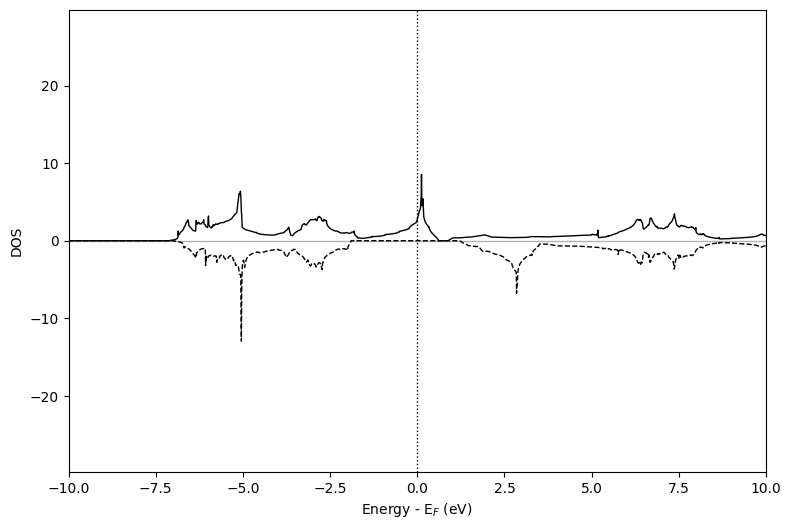

(<Figure size 900x600 with 1 Axes>,
 <Axes: xlabel='Energy - E$_F$ (eV)', ylabel='DOS'>)

In [2]:
# Plot spin-polarized DOS in plain mode
pyprocar.dosplot(
    code='vasp',
    dirname=SPIN_POL_DATA_DIR,
    mode='plain',
    fermi=5.3017,
    elimit=[-10, 10],  # Energy range around Fermi level
)


**What you'll see in spin-polarized DOS:**
- Two DOS curves representing spin-up and spin-down channels
- Energy (eV) on the x-axis
- Density of states on the y-axis
- Fermi level indicated as a vertical line
- Spin channels differentiated by color or by positive/negative values

### 2.2 Customizing Spin-Polarized DOS

You can customize various aspects of the spin-polarized DOS plot, including colors, line styles, and orientations.

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

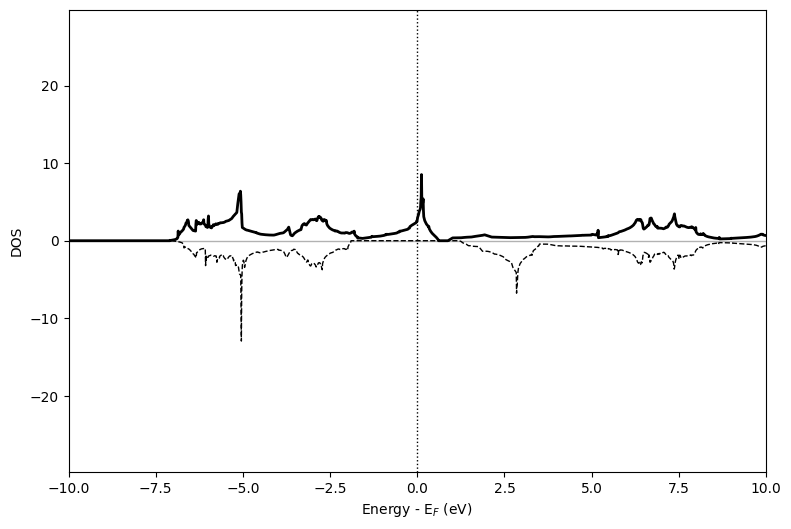

🎨 Customized spin-polarized DOS with purple spin-up and green spin-down


In [4]:
# Plot customized spin-polarized DOS
pyprocar.dosplot(
    code='vasp',
    dirname=SPIN_POL_DATA_DIR,
    mode='plain',
    fermi=5.3017,
    elimit=[-10, 10],  # Energy range around Fermi level
    linewidth=[2, 1],  # Customize linewidth for each spin channel
    linestyle=['solid', 'dashed'],  # Customize linestyle for each spin channel
    orientation='horizontal',  # Horizontal orientation (energy on x-axis)
)

print("🎨 Customized spin-polarized DOS with purple spin-up and green spin-down")

### 2.3 Parametric Mode - Spin-Polarized DOS with Orbital Projections

In parametric mode, we can visualize the orbital character of the DOS while maintaining the spin separation. This is particularly useful for understanding which orbitals contribute to specific energy regions in each spin channel.


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

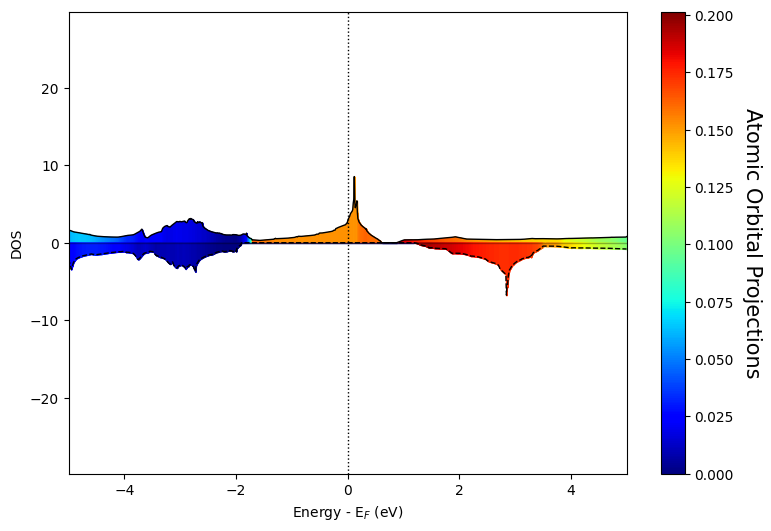

⚛️ Parametric DOS showing d-orbital contributions to each spin channel


In [5]:
# Plot spin-polarized DOS with d-orbital projections
pyprocar.dosplot(
    code='vasp',
    dirname=SPIN_POL_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    atoms=[1],  # Magnetic atom (often transition metal)
    orbitals=[4,5,6,7,8],  # d orbitals
    elimit=[-5, 5],
)

print("⚛️ Parametric DOS showing d-orbital contributions to each spin channel")

### 2.4 Individual Spin Channels

You can also plot specific spin channels separately to focus on one particular spin state.


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

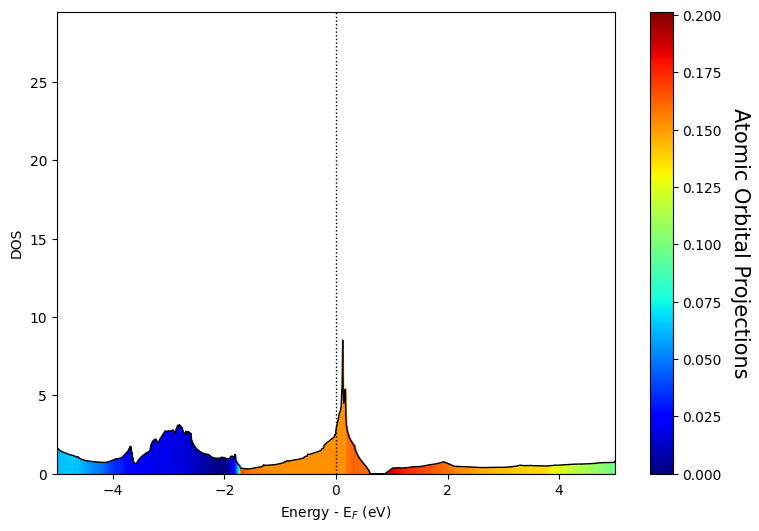

⬆️ Spin-up channel only: Focus on majority spin contribution
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109

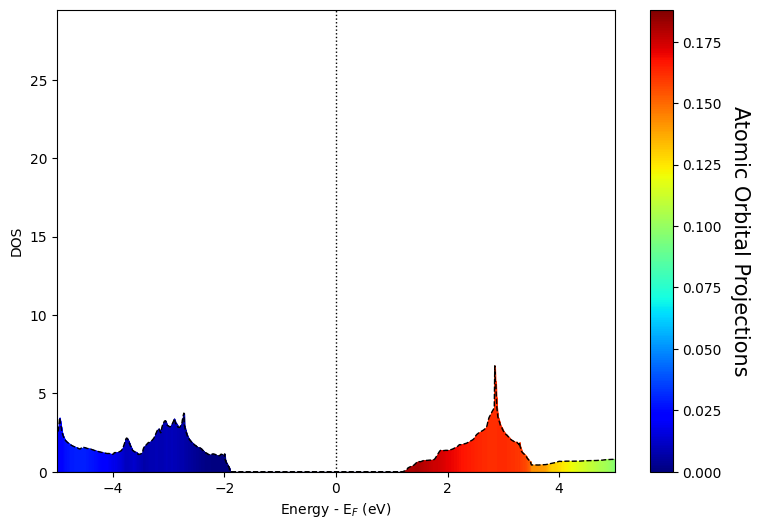

⬇️ Spin-down channel only: Focus on minority spin contribution


In [6]:
# Plot only spin-up DOS channel
pyprocar.dosplot(
    code='vasp',
    dirname=SPIN_POL_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    atoms=[1],
    orbitals=[4,5,6,7,8],  # d orbitals
    spins=[0],  # Only spin-up (index 0)
    elimit=[-5, 5],
)

print("⬆️ Spin-up channel only: Focus on majority spin contribution")

# Plot only spin-down DOS channel
pyprocar.dosplot(
    code='vasp',
    dirname=SPIN_POL_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    atoms=[1],
    orbitals=[4,5,6,7,8],  # d orbitals
    spins=[1],  # Only spin-down (index 1)
    elimit=[-5, 5],
)

print("⬇️ Spin-down channel only: Focus on minority spin contribution")


## 3. Non-Collinear DOS Plotting

In non-collinear magnetic systems, the spin quantization axis is not fixed, and spin-up and spin-down states are mixed. PyProcar handles this by providing spin projections (total, sx, sy, sz) that help understand the local magnetic character of different energy ranges.


### 3.1 Plain Mode - Non-Collinear DOS

First, let's plot the basic DOS without any spin projections to see the overall electronic density of states:


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

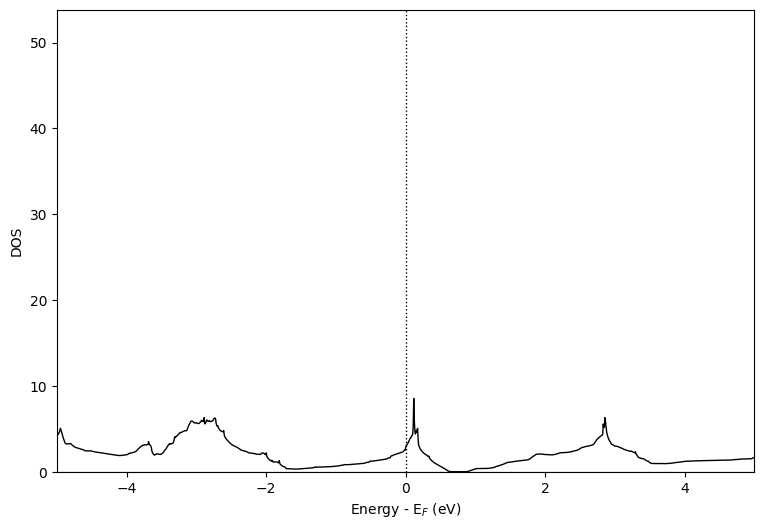

🧲 Non-collinear DOS: Single channel with mixed spin states


In [7]:
# Plot non-collinear DOS in plain mode
pyprocar.dosplot(
    code='vasp',
    dirname=NON_COLLINEAR_DATA_DIR,
    mode='plain',
    fermi=5.3017,
    elimit=[-5, 5],
    use_cache=True
)

print("🧲 Non-collinear DOS: Single channel with mixed spin states")


### 3.2 Spin Projections - Total Magnetization

In non-collinear systems, there are four spin projections available. These help understand the magnetic character of different energy regions in the DOS.

**Available spin projections:**
- **Total magnetization**: `spins=[0]` - Overall magnetic density
- **Sx magnetization**: `spins=[1]` - x-component of local magnetic moments  
- **Sy magnetization**: `spins=[2]` - y-component of local magnetic moments
- **Sz magnetization**: `spins=[3]` - z-component of local magnetic moments


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

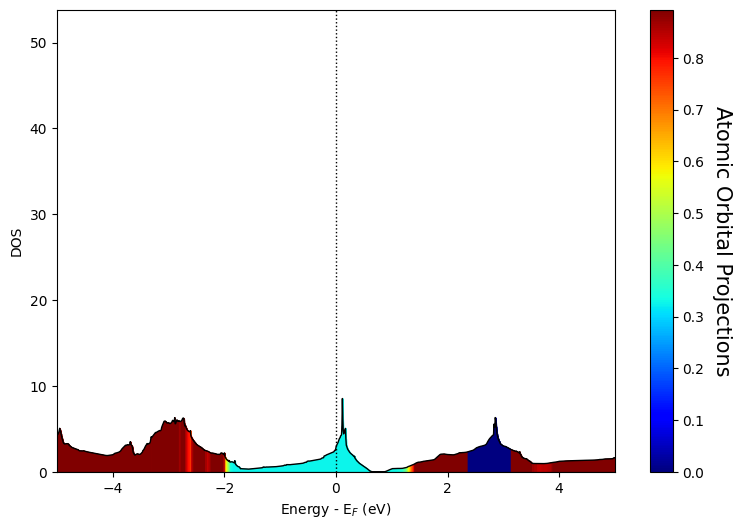

🎯 Total magnetization: Shows overall magnetic character of DOS


In [9]:
# Plot DOS with total magnetization projection
pyprocar.dosplot(
    code='vasp',
    dirname=NON_COLLINEAR_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    spins=[0],  # Total magnetization
    elimit=[-5, 5],
)

print("🎯 Total magnetization: Shows overall magnetic character of DOS")

### 3.3 Spin Component Projections

We can also visualize the individual spin components (sx, sy, sz) to understand which energy regions contribute to different spatial orientations of the magnetic moments:

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

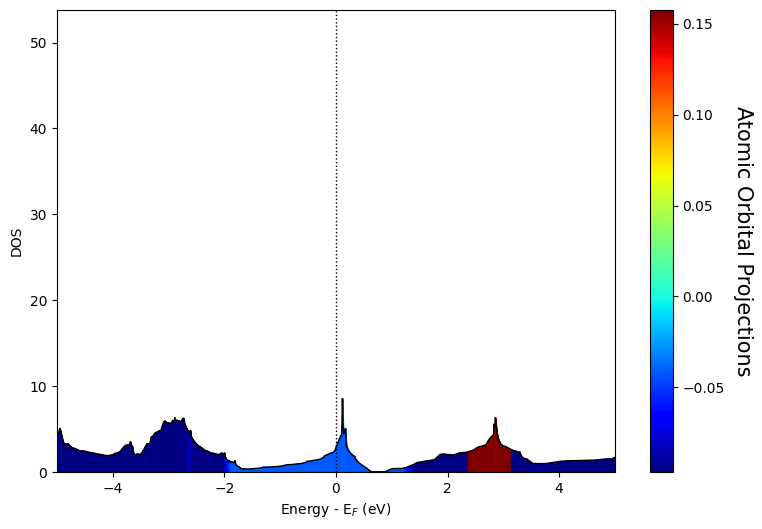

↔️ Sx component: Magnetic moments oriented along x-direction


In [10]:
# Plot DOS with sx component (x-direction spin)
pyprocar.dosplot(
    code='vasp',
    dirname=NON_COLLINEAR_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    spins=[1],  # Sx component
    elimit=[-5, 5],
)

print("↔️ Sx component: Magnetic moments oriented along x-direction")

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

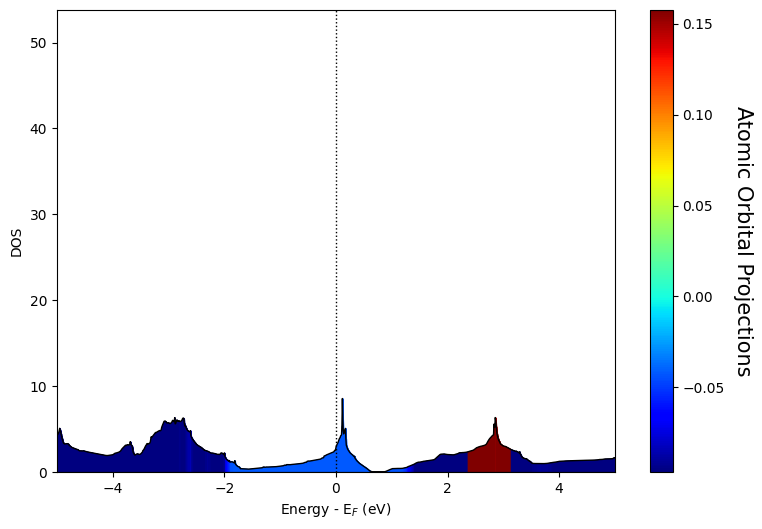

↕️ Sy component: Magnetic moments oriented along y-direction


In [12]:
# Plot DOS with sy component (y-direction spin)
pyprocar.dosplot(
    code='vasp',
    dirname=NON_COLLINEAR_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    spins=[2],  # Sy component
    elimit=[-5, 5],
)

print("↕️ Sy component: Magnetic moments oriented along y-direction")


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

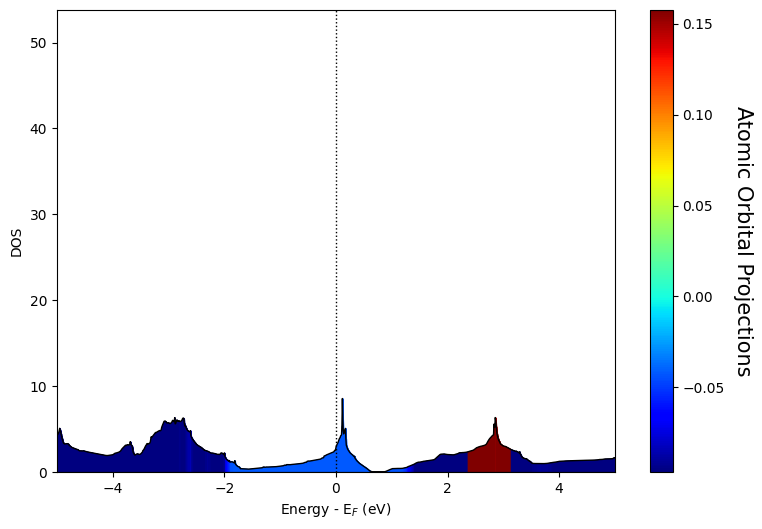

🔼 Sz component: Magnetic moments oriented along z-direction


In [14]:
# Plot DOS with sz component (z-direction spin)
pyprocar.dosplot(
    code='vasp',
    dirname=NON_COLLINEAR_DATA_DIR,
    mode='parametric',
    fermi=5.3017,
    spins=[3],  # Sz component
    elimit=[-5, 5],
)

print("🔼 Sz component: Magnetic moments oriented along z-direction")